In [146]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import statistics

In [147]:
def closest(lst, K):
      
     lst = np.asarray(lst)
     idx = (np.abs(lst - K)).argmin()
     return lst[idx]
     
def counts_to_irradiance(flame_data, integration_time, k_filepath):
    
    k_data = np.loadtxt(k_filepath,skiprows=1)
    irradiance = np.zeros(flame_data.shape)
    for i in range(len(irradiance[:,0])):
        irradiance[i,0] = flame_data[i,0]
        k_data_closest_index = np.where(k_data[:,0] == closest(k_data[:,0],flame_data[i,0]))[0]
        irradiance[i,1] = flame_data[i,1]*k_data[k_data_closest_index[0],1]/integration_time
        
    return irradiance
    


In [148]:
txt_filelist = os.listdir(os.path.join(os.getcwd(),'Red Sweep Opening'))
int_time = 0.0001*0.9
k_filepath = 'flame_to_irradiance_calibrationfile.txt'
spectra_data = None
bg_spectra = np.loadtxt(os.path.join('Red Sweep Opening',txt_filelist[0]), skiprows=1)

for i in range(0,100):
    load_spectra = np.loadtxt(os.path.join('Red Sweep Opening',txt_filelist[i]), skiprows=1)
    actual_txt_spectra = np.zeros(load_spectra.shape)
    actual_txt_spectra [:,0] = load_spectra[:,0]
    actual_txt_spectra [:,1] = load_spectra[:,1] - bg_spectra[:,1]
    actual_irradiance_spectra = counts_to_irradiance(actual_txt_spectra,int_time,k_filepath)
    if i == 0:
        spectra_data = actual_irradiance_spectra
    else:
        spectra_data = np.dstack((spectra_data, actual_irradiance_spectra))

cut_wl_relation = np.loadtxt(os.path.join('Red Sweep Opening','Red Sweep Opneing - cutting wavelenght relation.txt'), skiprows=1)

In [161]:
#Now load the measurement data
measurement_data = np.loadtxt('MCV.210602.OT2..Red Sweep Opening.txt', skiprows=1)

Jsc_divWL_interpolate = interpolate.interp1d(measurement_data[:,0],-1*measurement_data[:,2], kind='cubic')      #in mA/cm^2
wl_min = np.min(measurement_data[:,0])
wl_max = np.max(measurement_data[:,0])
interval = np.linspace(wl_min, wl_max)
Jsc_divWL = Jsc_divWL_interpolate(interval[:])

measure_divWL = measurement_data[:,0]

spectra_matrix = None
for i in range(len(Jsc_divWL)):
    actual_cut_wl = interval[i]
    actual_spectra_data_index_cutwl = np.where(cut_wl_relation[:,2] == closest(cut_wl_relation[:,2], actual_cut_wl))[0]
    actual_cut_wl_spectra = np.transpose(spectra_data[:,1,actual_spectra_data_index_cutwl[0]])
    #print([actual_cut_wl, cut_wl_relation[actual_spectra_data_index_cutwl[0],2]])
    if i == 0:
        spectra_matrix = actual_cut_wl_spectra
    else:
        spectra_matrix = np.vstack((spectra_matrix, actual_cut_wl_spectra))

for i in range(len(spectra_matrix[:,0])):
    for j in range(len(spectra_matrix[0,:])):
        if abs(spectra_matrix[i,j])<=0.001:
            spectra_matrix[i,j] = 0





In [163]:
wl_interval = 10
c_matrix_wl = range(360, 760, 1)
c_matrix = np.zeros((len(measurement_data[:,0]),len(measurement_data[:,0])))
for i in range(len(c_matrix[:,0])):
    spectra_interp = interpolate.interp1d(spectra_data[:,0,0], spectra_matrix[i,:])
    for j in range(len(Jsc_divWL)-1):
        actual_wl = c_matrix_wl[10*j:10*(j+1)]
        mean = statistics.mean(spectra_interp(actual_wl[:]))
        c_matrix[i,j] = 0.1*mean*Jsc_divWL[j]*wl_interval/1240
        #print(c_matrix_wl[10*j],measurement_data[j,0])
        

fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(spectra_data[:,0,0], spectra_matrix[40,:])
#ax.plot(spectra_data[:,0,0], spectra_interp(spectra_data[:,0,0]))
ax.plot(measure_divWL[:], np.flip(c_matrix[40,:]))

StatisticsError: mean requires at least one data point

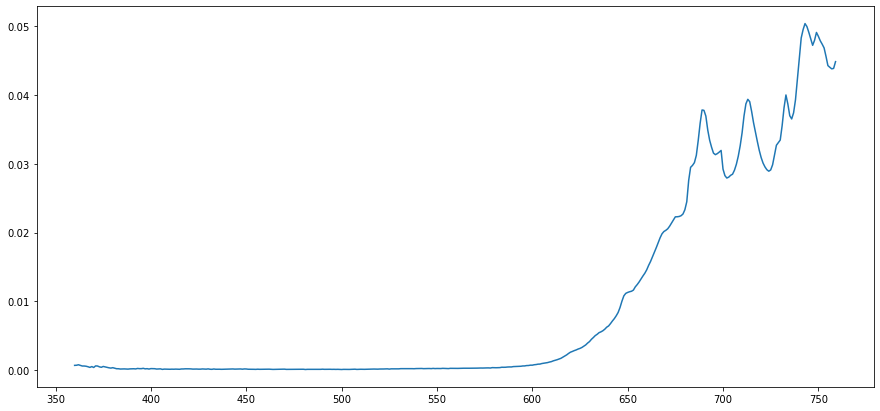

In [164]:
wl_interval = 1
c_matrix_wl = range(360, 760, 1)
c_matrix = np.zeros((len(measurement_data[:,0]),len(c_matrix_wl)))
for i in range(len(c_matrix[:,0])):
    spectra_interp = interpolate.interp1d(spectra_data[:,0,0], spectra_matrix[i,:])
    for j in range(len(c_matrix[0,:])):
        actual_wl = c_matrix_wl[j]
        #mean = statistics.mean(spectra_interp(actual_wl[:]))
        c_matrix[i,j] = 0.1*spectra_interp(actual_wl)*actual_wl*wl_interval/1240
        
        
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(spectra_data[:,0,0], spectra_matrix[40,:])
#ax.plot(spectra_data[:,0,0], spectra_interp(spectra_data[:,0,0]))
ax.plot(c_matrix_wl[:], c_matrix[40,:])

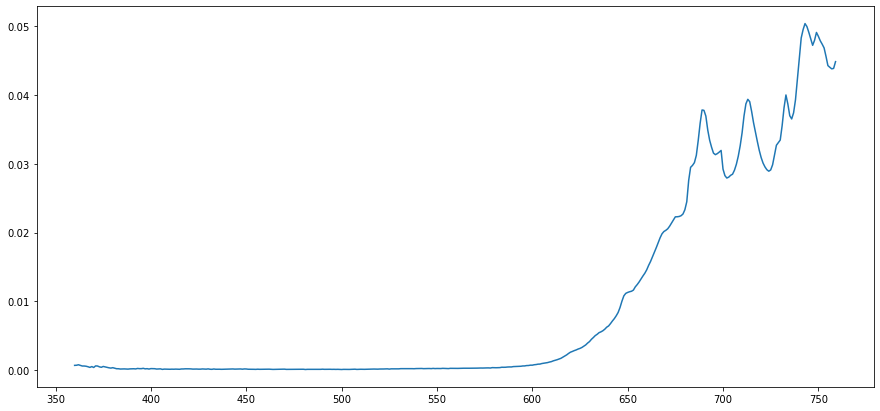

In [165]:
fig, ax = plt.subplots(figsize=(15,7))
#ax.plot(spectra_data[:,0,0], spectra_matrix[40,:])
#ax.plot(spectra_data[:,0,0], spectra_interp(spectra_data[:,0,0]))
ax.plot(c_matrix_wl[:], c_matrix[40,:])

In [114]:
print(spectra_matrix[:,440])


[0.00000000e+00 0.00000000e+00 1.21095003e-03 1.57882841e-03
 1.56216204e-03 2.04263968e-03 1.86622071e-03 2.38856732e-03
 2.17556375e-03 2.68205712e-03 2.62921271e-03 2.78896531e-03
 3.53041314e-03 3.25684158e-03 3.77878179e-03 4.07796251e-03
 4.25641397e-03 5.93076872e-03 5.87995680e-03 7.27911421e-03
 7.53927127e-03 1.12477295e-02 1.42379099e-02 3.16574599e-02
 8.65286562e-02 2.06824890e-01 4.07865757e-01 6.72199592e-01
 1.04732255e+00 1.19192721e+00 1.25342469e+00 1.27356572e+00
 1.27322102e+00 1.27512057e+00 1.27806685e+00 1.28037330e+00
 1.27745548e+00 1.27891480e+00 1.27785832e+00 1.27829611e+00
 1.27766157e+00]


In [166]:
#Here we do the calculations with the linear equations system


EQE_linearsolution, residuals, rank, s = np.linalg.lstsq(c_matrix, np.flip(Jsc_divWL), rcond=None)
fig, ax = plt.subplots(figsize=(15,7))

#print(EQE_linearsolution)
#ax.plot(sf.Extract_Column(Active_layer_1.EQE_curve, 0), 1*np.array(sf.Extract_Column(Active_layer_1.EQE_curve, 1)), label = 'Real EQE')
ax.plot(measure_divWL[:], abs(EQE_linearsolution), label = 'Calculated EQE')
#ax.plot(spectra_data[:,0,20],spectra_data[:,1,99])
ax.legend()
#plt.ylim(0,10000)
#plt.xlim(350,740)
plt.figsize=(8, 6)



LinAlgError: Incompatible dimensions

In [113]:
print(Solar_data_nparray)

NameError: name 'Solar_data_nparray' is not defined